In [ ]:
import cv2
import numpy as np
import importlib
from google.cloud import documentai_v1 as documentai
from google.api_core.client_options import ClientOptions
from google.oauth2 import service_account
import os
from google.cloud import vision_v1 as vision
import functions as f
from utils import file_operations
import matplotlib.pyplot as plt  
importlib.reload(file_operations)
importlib.reload(f)

ImportError: cannot import name 'types' from 'google.cloud.vision' (d:\burtm\Visual_studio_code\conda_environments\gcloud\lib\site-packages\google\cloud\vision\__init__.py)

In [ ]:
# Path to your downloaded service account key file
SERVICE_ACCOUNT_KEY = "D:\download\PD project\handwriting_extraction\prototyping_utils\google_cloud\handwritingdetection-441514-f70876cabf34.json"
#os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "C:\GoogleCloudPlatform\my-key.json"

# Document AI project and processor details
PROJECT_ID = "123214537106"
LOCATION = "eu"  # Use "us" or "eu" based on your location
PROCESSOR_ID = "810c0fc2fc415b29"  # The processor ID created in Document AI
FORM_PARSER_ID = "c7b6524d6df8b2a1"  # The processor ID created in Document AI
#PROCESSOR_ID = "ebb855230addc0e6" 

# Set up credentials
credentials = service_account.Credentials.from_service_account_file(SERVICE_ACCOUNT_KEY)

opts = ClientOptions(api_endpoint=f"{LOCATION}-documentai.googleapis.com")
# Create a Document AI client
client = documentai.DocumentProcessorServiceClient(credentials=credentials,client_options=opts)
client = vision.ImageAnnotatorClient()

document_path_checkmarks="analysis_steps\\aligned_filled_template.png"
document_path_text="analysis_steps\\masked_filled_template_inverted.png"
# Load the images
#template = cv2.imread("template.png", cv2.IMREAD_GRAYSCALE)
filled_template_path="D:\download\PD project\handwriting_extraction\prototyping_utils\masking_template\\filled_template.jpg"
template_path="D:\download\PD project\handwriting_extraction\prototyping_utils\masking_template\\template.png"
template = cv2.imread(template_path, cv2.IMREAD_GRAYSCALE)
filled_template = cv2.imread(filled_template_path, cv2.IMREAD_GRAYSCALE)
#template_rgb = cv2.imread("D:\download\PD project\handwriting_extraction\prototyping_utils\masking_template\\template.png")
#filled_template_rgb = cv2.imread("D:\download\PD project\handwriting_extraction\prototyping_utils\masking_template\\filled_template.jpg")

In [4]:
# Example usage
folder = "analysis_steps"
file_operations.delete_all_files_in_folder(folder)

Deleted: analysis_steps\aligned_filled_template.png
Deleted: analysis_steps\image_with_bounding_boxes.png
Deleted: analysis_steps\mix_aligned_filled_template_and_template.png
Deleted: analysis_steps\mix_resized_filled_template_and_template.png
Deleted: analysis_steps\output_checkmarks.png
Deleted: analysis_steps\resized_filled_template.png
Deleted: analysis_steps\tokens_pre.png


In [5]:
#resized_filled_template=f.match_image_dimensions(filled_template_rgb, template_rgb)
#aligned_filled_template=f.align_to_template(resized_filled_template, template_rgb)
resized_filled_template=f.match_image_dimensions(filled_template, template)
aligned_filled_template=f.align_to_template(resized_filled_template, template)

In [6]:
f.superimpose_images("analysis_steps\\resized_filled_template.png", template_path, "mix_resized_filled_template_and_template.png")
f.superimpose_images("analysis_steps\\aligned_filled_template.png", template_path, "mix_aligned_filled_template_and_template.png")

Superimposed image saved as analysis_steps\mix_resized_filled_template_and_template.png
Superimposed image saved as analysis_steps\mix_aligned_filled_template_and_template.png


In [36]:
_,document = f.process_document(document_path_checkmarks,FORM_PARSER_ID,PROJECT_ID,LOCATION,client)
bounding_boxes=f.show_checkmarks(document_path_checkmarks, document,color=(255,0,0))
print(bounding_boxes)
#bounding_boxes=f.show_paragraphs(document_path_checkmarks, document,color=(0,0,255),bounding_boxes=bounding_boxes,file_name="paragraphs_pre.png")

Image with checkmarks saved as analysis_steps\output_checkmarks.png
[[[(284, 330), (299, 330), (299, 345), (284, 345)], 'filled_checkbox'], [[(362, 813), (378, 813), (378, 829), (362, 829)], 'filled_checkbox'], [[(530, 694), (546, 694), (546, 712), (530, 712)], 'filled_checkbox'], [[(73, 556), (88, 556), (88, 571), (73, 571)], 'filled_checkbox'], [[(325, 978), (341, 978), (341, 997), (325, 997)], 'filled_checkbox'], [[(72, 911), (87, 911), (87, 927), (72, 927)], 'filled_checkbox'], [[(73, 581), (88, 581), (88, 597), (73, 597)], 'filled_checkbox'], [[(71, 787), (90, 787), (90, 805), (71, 805)], 'filled_checkbox'], [[(609, 500), (635, 500), (635, 524), (609, 524)], 'filled_checkbox'], [[(669, 9), (706, 10), (705, 41), (668, 40)], 'to_determine'], [[(705, 9), (742, 10), (741, 42), (704, 41)], 'to_determine'], [[(741, 11), (777, 12), (776, 43), (740, 42)], 'to_determine'], [[(777, 11), (814, 12), (813, 44), (776, 43)], 'to_determine'], [[(667, 28), (809, 29), (809, 38), (667, 37)], 'to_det

In [38]:
bounding_boxes=f.show_tokens(document_path_checkmarks, document,color=(0,255,0),bounding_boxes=bounding_boxes,file_name="tokens_pre.png")
print(bounding_boxes)

Image with handwritten text saved as analysis_steps\tokens_pre.png
[[[(284, 330), (299, 330), (299, 345), (284, 345)], 'filled_checkbox'], [[(362, 813), (378, 813), (378, 829), (362, 829)], 'filled_checkbox'], [[(530, 694), (546, 694), (546, 712), (530, 712)], 'filled_checkbox'], [[(73, 556), (88, 556), (88, 571), (73, 571)], 'filled_checkbox'], [[(325, 978), (341, 978), (341, 997), (325, 997)], 'filled_checkbox'], [[(72, 911), (87, 911), (87, 927), (72, 927)], 'filled_checkbox'], [[(73, 581), (88, 581), (88, 597), (73, 597)], 'filled_checkbox'], [[(71, 787), (90, 787), (90, 805), (71, 805)], 'filled_checkbox'], [[(609, 500), (635, 500), (635, 524), (609, 524)], 'filled_checkbox'], [[(669, 9), (706, 10), (705, 41), (668, 40)], 'to_determine'], [[(705, 9), (742, 10), (741, 42), (704, 41)], 'to_determine'], [[(741, 11), (777, 12), (776, 43), (740, 42)], 'to_determine'], [[(777, 11), (814, 12), (813, 44), (776, 43)], 'to_determine'], [[(667, 28), (809, 29), (809, 38), (667, 37)], 'to_dete

In [39]:
for i in range(len(bounding_boxes)):
    bounding_boxes[i][0]=f.magnify_bb(bounding_boxes[i][0],magnification=1.5)
print(bounding_boxes)

[[[(283, 329), (299, 329), (299, 345), (283, 345)], 'filled_checkbox'], [[(361, 812), (378, 812), (378, 829), (361, 829)], 'filled_checkbox'], [[(529, 693), (546, 693), (546, 712), (529, 712)], 'filled_checkbox'], [[(72, 555), (88, 555), (88, 571), (72, 571)], 'filled_checkbox'], [[(324, 977), (341, 977), (341, 997), (324, 997)], 'filled_checkbox'], [[(71, 910), (87, 910), (87, 927), (71, 927)], 'filled_checkbox'], [[(72, 580), (88, 580), (88, 597), (72, 597)], 'filled_checkbox'], [[(70, 786), (90, 786), (90, 805), (70, 805)], 'filled_checkbox'], [[(607, 498), (636, 498), (636, 525), (607, 525)], 'filled_checkbox'], [[(667, 7), (707, 8), (706, 42), (666, 41)], 'to_determine'], [[(703, 7), (743, 8), (742, 43), (702, 42)], 'to_determine'], [[(739, 9), (778, 10), (777, 44), (738, 43)], 'to_determine'], [[(775, 9), (815, 10), (814, 45), (774, 44)], 'to_determine'], [[(659, 27), (816, 28), (816, 38), (659, 37)], 'to_determine'], [[(33, 107), (183, 103), (185, 162), (35, 166)], 'to_determine

In [9]:
'''dilated_mask=f.mask_from_template(template)
masked_filled_template_inverted=f.apply_mask(aligned_filled_template, dilated_mask)
darken_roi=f.darken_roi(masked_filled_template_inverted)'''
#_,document_text = f.process_document(document_path_text,PROCESSOR_ID,PROJECT_ID,LOCATION,client)
#bounding_boxes=f.show_tokens(document_path_text, document_text,color=(0,255,0),bounding_boxes=bounding_boxes,file_name="tokens_post.png")
#bounding_boxes=f.show_paragraphs(document_path_text, document_text,color=(0,0,255),bounding_boxes=bounding_boxes,file_name="paragraphs_post.png")
#print([b[1] for b in bounding_boxes])

'dilated_mask=f.mask_from_template(template)\nmasked_filled_template_inverted=f.apply_mask(aligned_filled_template, dilated_mask)\ndarken_roi=f.darken_roi(masked_filled_template_inverted)'

In [10]:
operations=list({"average":1,"cc":0,"ssim":0.8,"histogram":0.8,"orb":10,"entropy":0.1,"contours":0,"texture":0.1,"edges":1000,"template":0.8}.keys())
data_list=[]
for o in operations:
    new_bounding_boxes=f.filter_typed(aligned_filled_template,template, bounding_boxes,operation=o)
    data_list.append(list(b[2] for b in new_bounding_boxes))


d:\burtm\Visual_studio_code\conda_environments\gcloud\lib\site-packages\skimage\metrics\_structural_similarity.py:242: RuntimeWarning: divide by zero encountered in scalar divide
  cov_norm = NP / (NP - 1)  # sample covariance
d:\burtm\Visual_studio_code\conda_environments\gcloud\lib\site-packages\skimage\metrics\_structural_similarity.py:254: RuntimeWarning: invalid value encountered in multiply
  vx = cov_norm * (uxx - ux * ux)
d:\burtm\Visual_studio_code\conda_environments\gcloud\lib\site-packages\skimage\metrics\_structural_similarity.py:255: RuntimeWarning: invalid value encountered in multiply
  vy = cov_norm * (uyy - uy * uy)
d:\burtm\Visual_studio_code\conda_environments\gcloud\lib\site-packages\skimage\metrics\_structural_similarity.py:256: RuntimeWarning: invalid value encountered in multiply
  vxy = cov_norm * (uxy - ux * uy)


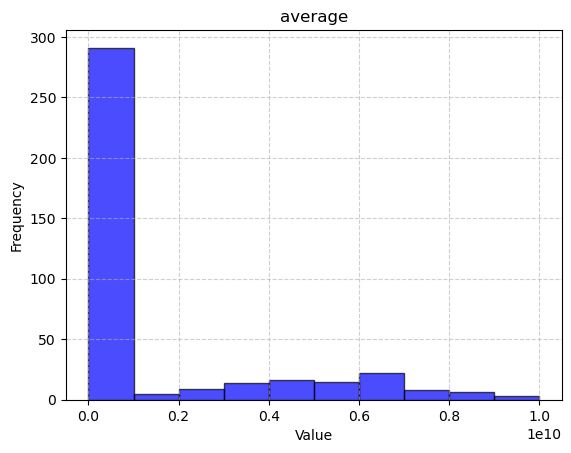

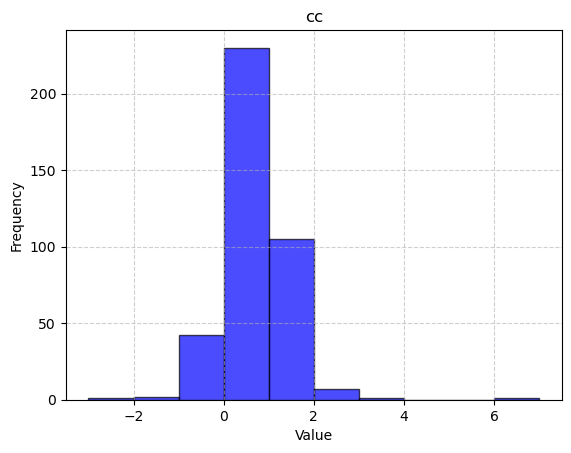

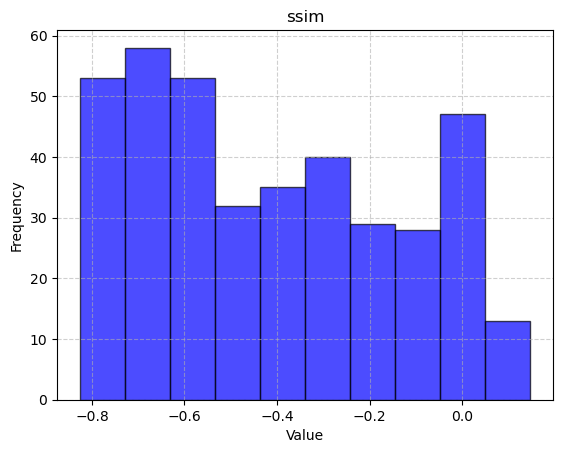

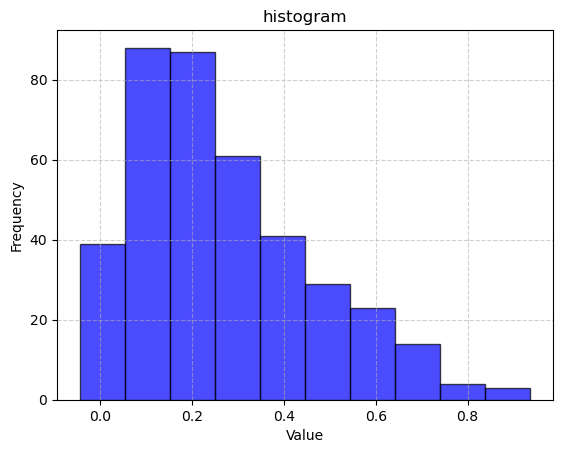

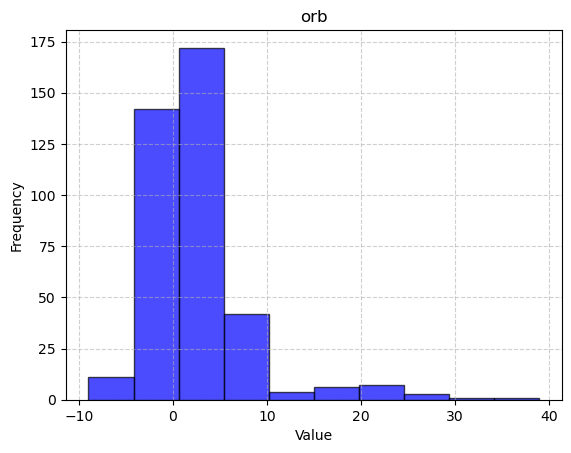

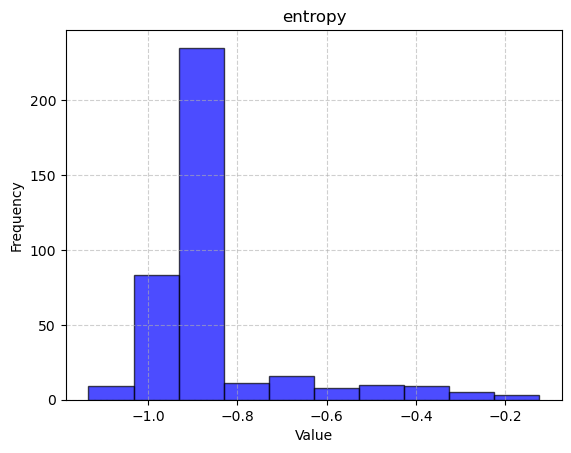

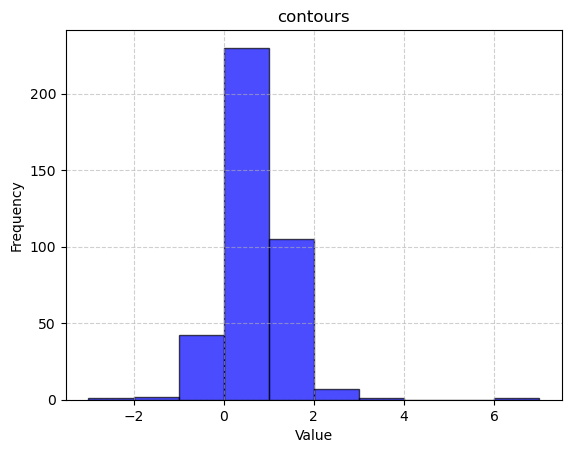

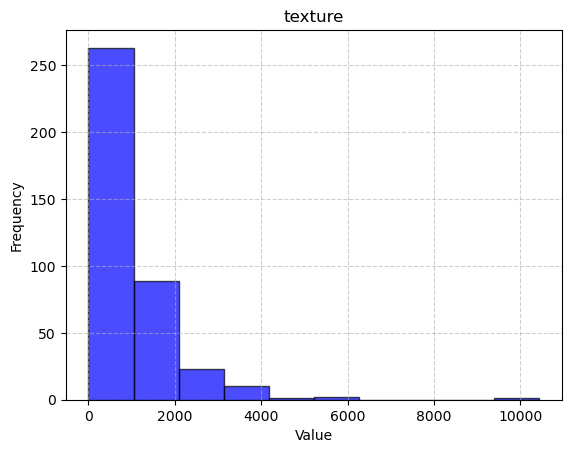

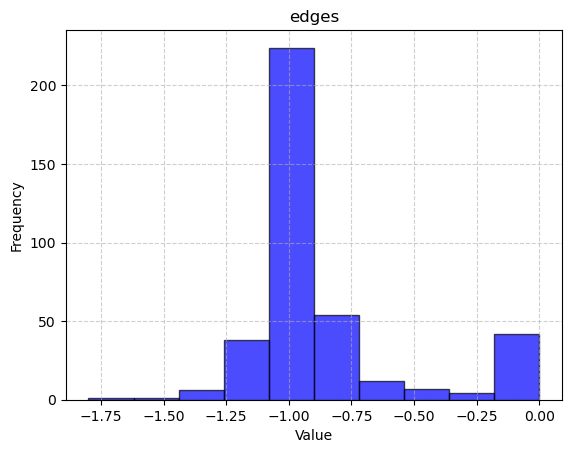

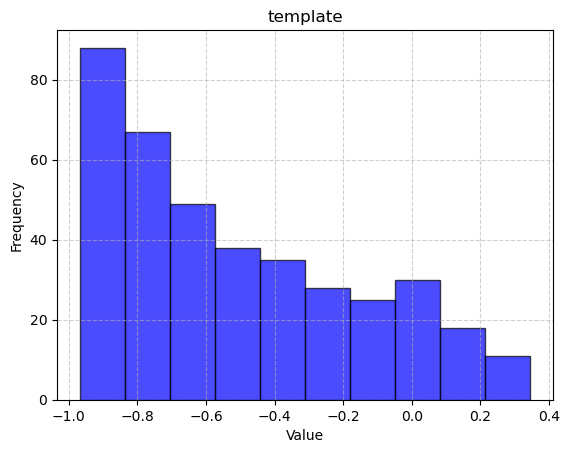

In [11]:
for i, (title, data) in enumerate(zip(operations, data_list)):
    plt.figure(i + 1)  # Create a new figure for each histogram
    plt.hist(data, bins=10, color='blue', alpha=0.7, edgecolor='black')
    plt.title(title)  # Set the title of the histogram
    plt.xlabel('Value')  # Label for x-axis
    plt.ylabel('Frequency')  # Label for y-axis
    plt.grid(True, linestyle='--', alpha=0.6)  # Add grid for better readability

plt.show()  # Display all figures

In [42]:
importlib.reload(f)
file_operations.delete_all_files_in_folder("Frames")
new_bounding_boxes=f.filter_typed(aligned_filled_template,template, bounding_boxes,operation="cc",operation_2="average")
print(new_bounding_boxes)
#f.process_bounding_box(template, [(0,0),(template.shape[1],0),(template.shape[1],template.shape[0]),(0,template.shape[0])], file_name="processed.png")

[[[(283, 329), (299, 329), (299, 345), (283, 345)], 'filled_checkbox', 0], [[(361, 812), (378, 812), (378, 829), (361, 829)], 'filled_checkbox', 1], [[(529, 693), (546, 693), (546, 712), (529, 712)], 'filled_checkbox', 1], [[(72, 555), (88, 555), (88, 571), (72, 571)], 'filled_checkbox', 1], [[(324, 977), (341, 977), (341, 997), (324, 997)], 'filled_checkbox', 1], [[(71, 910), (87, 910), (87, 927), (71, 927)], 'filled_checkbox', 1], [[(72, 580), (88, 580), (88, 597), (72, 597)], 'filled_checkbox', 1], [[(70, 786), (90, 786), (90, 805), (70, 805)], 'filled_checkbox', 1], [[(607, 498), (636, 498), (636, 525), (607, 525)], 'filled_checkbox', 1], [[(667, 7), (707, 8), (706, 42), (666, 41)], 'handwritten', 1], [[(703, 7), (743, 8), (742, 43), (702, 42)], 'typed', 0], [[(739, 9), (778, 10), (777, 44), (738, 43)], 'typed', 0], [[(775, 9), (815, 10), (814, 45), (774, 44)], 'typed', 0], [[(659, 27), (816, 28), (816, 38), (659, 37)], 'typed', 4], [[(33, 107), (183, 103), (185, 162), (35, 166)], 

In [43]:
#f.show_bounding_boxes(cv2.imread("analysis_steps\\processed.png", cv2.IMREAD_GRAYSCALE), new_bounding_boxes,file_name="mask_image_with_bounding_boxes.png")
f.show_bounding_boxes(aligned_filled_template, new_bounding_boxes)#,file_name="cc_entropy_image_with_bounding_boxes.png")
#https://chatgpt.com/share/673b6b45-2330-8010-bfb9-d9cfaed3a7e1 other features

Image with bounding boxes saved as image_with_bounding_boxes.png


In [ ]:
cropped_image=f.preprocess_bounding_box(aligned_filled_template,new_bounding_boxes[i][0],operation="none")
f.recognize_handwritten_text(client,cropped_image)